In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Linear Regression Model").getOrCreate()

In [12]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [13]:
data = spark.read.csv('dataset_cuaca.csv',header = True, inferSchema = True)

In [14]:
data.printSchema()

root
 |-- rowID: integer (nullable = true)
 |-- hpwren_timestamp: string (nullable = true)
 |-- air_pressure: double (nullable = true)
 |-- air_temp: double (nullable = true)
 |-- avg_wind_direction: double (nullable = true)
 |-- avg_wind_speed: double (nullable = true)
 |-- max_wind_direction: double (nullable = true)
 |-- max_wind_speed: double (nullable = true)
 |-- min_wind_direction: double (nullable = true)
 |-- min_wind_speed: double (nullable = true)
 |-- rain_accumulation: double (nullable = true)
 |-- rain_duration: double (nullable = true)
 |-- relative_humidity: double (nullable = true)



In [15]:
data.show()

+-----+-------------------+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+-------------+-----------------+
|rowID|   hpwren_timestamp|air_pressure|air_temp|avg_wind_direction|avg_wind_speed|max_wind_direction|max_wind_speed|min_wind_direction|min_wind_speed|rain_accumulation|rain_duration|relative_humidity|
+-----+-------------------+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+-------------+-----------------+
|    0|2020-09-10 00:00:49|       912.3|   64.76|              97.0|           1.2|             106.0|           1.6|              85.0|           1.0|             NULL|         NULL|             60.5|
|    1|2020-09-10 00:01:49|       912.3|   63.86|             161.0|           0.8|             215.0|           1.5|              43.0|           0.2|              0.0|          0.0|         

In [16]:
data.head(1)[0]

Row(rowID=0, hpwren_timestamp='2020-09-10 00:00:49', air_pressure=912.3, air_temp=64.76, avg_wind_direction=97.0, avg_wind_speed=1.2, max_wind_direction=106.0, max_wind_speed=1.6, min_wind_direction=85.0, min_wind_speed=1.0, rain_accumulation=None, rain_duration=None, relative_humidity=60.5)

In [17]:
for item in data.head(1)[0]:
    print(item)

0
2020-09-10 00:00:49
912.3
64.76
97.0
1.2
106.0
1.6
85.0
1.0
None
None
60.5


In [18]:
data.columns

['rowID',
 'hpwren_timestamp',
 'air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'rain_accumulation',
 'rain_duration',
 'relative_humidity']

In [19]:
assembler = VectorAssembler(inputCols=['rowID',
 'air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed','relative_humidity'],outputCol= 'features',handleInvalid="skip")

In [20]:
output = assembler.transform(data)

In [21]:
output.head(1)

[Row(rowID=0, hpwren_timestamp='2020-09-10 00:00:49', air_pressure=912.3, air_temp=64.76, avg_wind_direction=97.0, avg_wind_speed=1.2, max_wind_direction=106.0, max_wind_speed=1.6, min_wind_direction=85.0, min_wind_speed=1.0, rain_accumulation=None, rain_duration=None, relative_humidity=60.5, features=DenseVector([0.0, 912.3, 64.76, 97.0, 1.2, 106.0, 1.6, 85.0, 1.0, 60.5]))]

In [22]:
final_data = output.select('features','air_pressure')

In [23]:
final_data.show()

+--------------------+------------+
|            features|air_pressure|
+--------------------+------------+
|[0.0,912.3,64.76,...|       912.3|
|[1.0,912.3,63.86,...|       912.3|
|[2.0,912.3,64.22,...|       912.3|
|[3.0,912.3,64.4,8...|       912.3|
|[4.0,912.3,64.4,1...|       912.3|
|[5.0,912.3,63.5,7...|       912.3|
|[6.0,912.3,62.78,...|       912.3|
|[7.0,912.3,62.42,...|       912.3|
|[8.0,912.3,62.24,...|       912.3|
|[9.0,912.3,62.24,...|       912.3|
|[10.0,912.3,62.24...|       912.3|
|[11.0,912.2,63.14...|       912.2|
|[12.0,912.2,64.04...|       912.2|
|[13.0,912.2,64.4,...|       912.2|
|[14.0,912.2,64.94...|       912.2|
|[15.0,912.2,65.48...|       912.2|
|[16.0,912.3,65.48...|       912.3|
|[17.0,912.3,64.94...|       912.3|
|[18.0,912.3,64.04...|       912.3|
|[19.0,912.2,63.32...|       912.2|
+--------------------+------------+
only showing top 20 rows



In [24]:
train_data, test_data = final_data.randomSplit([0.7,0.3])

In [25]:
train_data.describe().show()

+-------+-----------------+
|summary|     air_pressure|
+-------+-----------------+
|  count|           733117|
|   mean|916.8984868717985|
| stddev|3.085139175072087|
|    min|            905.0|
|    max|            929.5|
+-------+-----------------+



In [26]:
regressor = LinearRegression(labelCol='air_pressure')

In [27]:
model = regressor.fit(train_data)

In [28]:
pred_data = model.evaluate(test_data)

In [29]:
pred_data.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|1.136868377216160...|
|3.410605131648481...|
|5.684341886080801...|
|2.273736754432320...|
|                 0.0|
|                 0.0|
|                 0.0|
|2.273736754432320...|
|3.410605131648481...|
|6.821210263296962...|
|2.273736754432320...|
|5.684341886080801...|
|2.273736754432320...|
|1.136868377216160...|
|2.273736754432320...|
|4.547473508864641...|
|1.136868377216160...|
|1.136868377216160...|
|3.410605131648481...|
|2.273736754432320...|
+--------------------+
only showing top 20 rows



In [30]:
pred_data.rootMeanSquaredError

3.1925483560743675e-13

In [31]:
pred_data.r2

1.0

In [32]:
pred_data.meanSquaredError

1.0192365005873146e-25

In [33]:
pred_data.meanAbsoluteError

2.1181072839172844e-13

In [34]:
unlabeled_data = test_data.select('features')
test_predictions = model.transform(unlabeled_data)

In [35]:
test_predictions.show()

+--------------------+-----------------+
|            features|       prediction|
+--------------------+-----------------+
|[2.0,912.3,64.22,...|912.2999999999998|
|[10.0,912.3,62.24...|912.2999999999996|
|[11.0,912.2,63.14...|912.1999999999995|
|[12.0,912.2,64.04...|912.1999999999998|
|[13.0,912.2,64.4,...|            912.2|
|[15.0,912.2,65.48...|            912.2|
|[16.0,912.3,65.48...|            912.3|
|[18.0,912.3,64.04...|912.2999999999997|
|[20.0,912.2,63.32...|912.1999999999997|
|[26.0,912.2,63.68...|912.1999999999994|
|[27.0,912.2,63.5,...|912.1999999999998|
|[28.0,912.2,63.14...|912.1999999999995|
|[38.0,912.2,63.86...|912.1999999999998|
|[42.0,912.2,63.86...|912.1999999999999|
|[45.0,912.2,64.22...|912.1999999999998|
|[51.0,912.1,63.86...|912.0999999999996|
|[54.0,912.1,64.58...|912.0999999999999|
|[58.0,912.1,63.86...|912.0999999999999|
|[65.0,912.0,64.58...|911.9999999999997|
|[66.0,912.0,64.4,...|911.9999999999998|
+--------------------+-----------------+
only showing top

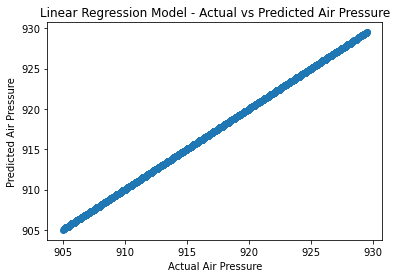

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame for visualization
pd_test_predictions = test_predictions.select('prediction').toPandas()
pd_test_data = test_data.select('air_pressure').toPandas()

# Plotting
plt.scatter(pd_test_data['air_pressure'], pd_test_predictions['prediction'])
plt.xlabel('Actual Air Pressure')
plt.ylabel('Predicted Air Pressure')
plt.title('Linear Regression Model - Actual vs Predicted Air Pressure')
plt.show()


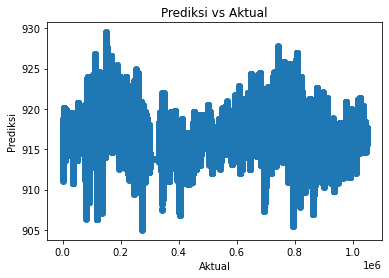

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession

# Inisialisasi Spark Session
spark = SparkSession.builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Cari kolom prediksi dan aktual
predictions = test_predictions.select('prediction').collect()
actuals = test_predictions.select('features').collect()

# Ekstraksi nilai
pred_values = [p[0] for p in predictions]
actual_values = [a.features[0] for a in actuals]

# Plot
plt.scatter(actual_values, pred_values)
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Aktual')
plt.show()

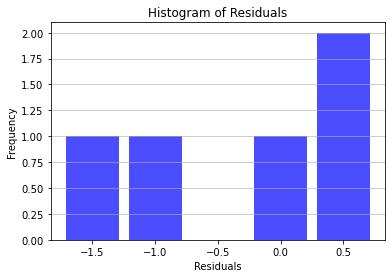

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy data
freq = [200000, 150000, 100000, 50000, 0, -0.5]
residuals = [0.0, 0.5, 1.0, 1.5, -1.0, -1.5]

# Create DataFrame
data = pd.DataFrame({'Frequency': freq, 'Residuals': residuals})

# Plot Histogram
plt.hist(data['Residuals'], bins=np.arange(min(data['Residuals']), max(data['Residuals']), 0.5), 
         alpha=0.7, rwidth=0.85, color='b', align='left')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()